In [15]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt


valid_df=pd.read_csv('/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/annotations_v2/valid_total.csv')
txt_path='/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/faster-rcnn-output.txt'
predicted_boxes={}

with open(txt_path,'r') as f:
    for line in f:
        parts=line.strip().split(',')
        img_id=int(parts[0])
        box=list(map(float,parts[1:]))
        if img_id not in predicted_boxes:
            predicted_boxes[img_id]=[]
        predicted_boxes[img_id].append(box)

In [55]:
len(predicted_boxes.keys())

170

In [16]:
predicted_boxes[273]

[[3450.58056640625, 821.8793334960938, 3553.82373046875, 885.0],
 [3458.52587890625, 838.4840698242188, 3532.077392578125, 876.2684326171875],
 [3463.9658203125, 855.4276733398438, 3533.22216796875, 885.0],
 [1243.0291748046875, 96.78994750976562, 5070.0, 885.0],
 [0.0, 325.7226257324219, 4316.70751953125, 860.9297485351562],
 [2423.568603515625, 247.69410705566406, 4835.283203125, 835.3363647460938],
 [0.0, 279.3078308105469, 4836.24658203125, 857.6769409179688]]

In [43]:
def plot_boxes(image_dir,image_number):
    row=valid_df[valid_df['image_number']==image_number]
    image_path=f'{image_dir}/{row["dataset"].values[0]}/{row["image_name"].values[0]}'
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    if row['bndbox'].values[0]!='[]':
        actual_boxes=list(eval(row['bndbox'].values[0]))
        for box in actual_boxes:
            start_point=(box[0],box[1])
            end_point=(box[2],box[3])
            image=cv2.rectangle(image,start_point,end_point,(255,0,0),2)
            
    if image_number in predicted_boxes:
        for box in predicted_boxes[image_number]:
            start_point=(int(box[0]),int(box[1]))
            end_point=(int(box[2]),int(box[3]))
            image=cv2.rectangle(image,start_point,end_point,(0,255,0),2)
            
    plt.imshow(image)
    plt.show()
            

In [33]:
image_dir='/home/irteam/junghye-dcloud-dir/pathfinder/data_contrast/before/Image'
image_number=273
row=valid_df[valid_df['image_number']==image_number]
row

,dataset,image_number,image_name,bndbox,labels,img_shape
1,Normal,273,6054-000098-3-3.jpg,[],[3],[]


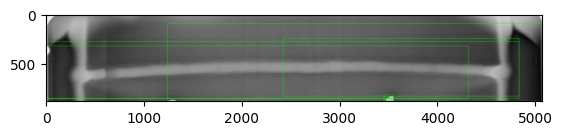

In [32]:
plot_boxes(image_dir,273) # 바운딩 박스가 없는데 ㅠㅠ

   dataset  image_number         image_name bndbox labels img_shape
11  Normal           741  6054-000229-2.jpg     []    [3]        []


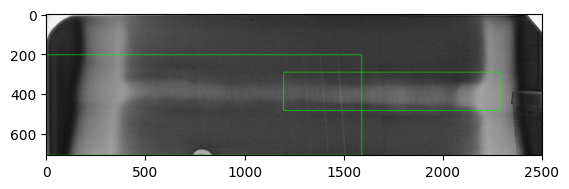

In [37]:
image_number=741
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

   dataset  image_number  image_name  \
33  Others          4891  j108-2.jpg   

                                               bndbox     labels  \
33  [[2156, 145, 2281, 173], [2007, 141, 2125, 167...  [0, 0, 0]   

          img_shape  
33  ['2849', '375']  


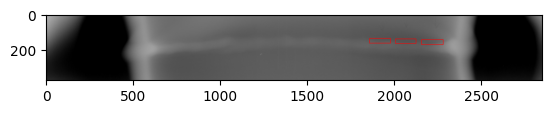

In [46]:
image_number=4891
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

    dataset  image_number         image_name bndbox labels img_shape
683  Normal          2948  6054-001854-2.jpg     []    [3]        []


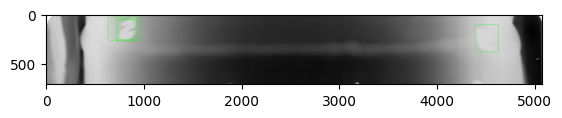

In [48]:
image_number=2948
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

    dataset  image_number              image_name  \
688    Slag          6854  6054-002837-A1-2-1.jpg   

                                               bndbox  labels        img_shape  
688  [[2702, 243, 2792, 279], [2370, 254, 2449, 282]]  [2, 2]  ['3090', '820']  


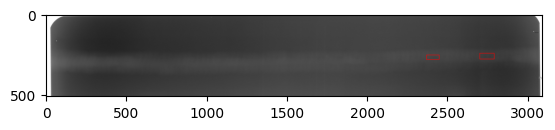

In [49]:
image_number=6854
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

    dataset  image_number           image_name bndbox labels img_shape
684  Normal           589  6054-000190-1-3.jpg     []    [3]        []


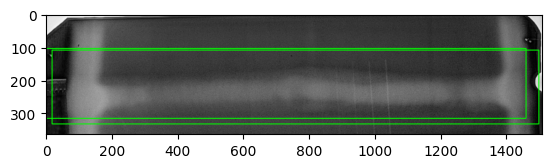

In [50]:
image_number=589
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

In [51]:
print(len(predicted_boxes))

170


In [ ]:
image_number=589
row=valid_df[valid_df['image_number']==image_number]
print(row)
plot_boxes(image_dir,image_number)

In [52]:
import sys

sys.path.append('/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/faster-rcnn')

from dataset import RT_Dataset
from augment import * 

train_df=pd.read_csv('/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/annotations_v2/train_total.csv')
valid_df=pd.read_csv('/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/annotations_v2/valid_total.csv')
image_dir='/home/irteam/junghye-dcloud-dir/pathfinder/data_contrast/before/Image'

train_dataset=RT_Dataset(train_df,image_dir,transforms=get_transform(train=True))
valid_dataset=RT_Dataset(valid_df,image_dir,transforms=get_transform(train=False))

In [53]:
len(valid_dataset)

697